**COMPUTATIONAL SYSTEMS BIOLOGY**

---
To submit your report, answer the questions below (creating new markdown cells to add your comments) and save the notebook clicking on File > Download as > iPython Notebook in the menu at the top of the page. Rename the notebook file to ''practicalN_name1_name2.ipynb'', where N is the number of the practical, and name1 and name2 are the first surnames of the two team members (only one name if the report is sent individually). Finally, submit the resulting file through the Aula Global.

IMPORTANT: Before the final submission, remember to reset the kernel and re-run the whole notebook again to check that it works.

---

First we load all necessary modules. To execute the cell, select `Cell -> run` or click `Shift+Enter`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

## Negative feedback

Now we define the model describing a protein that inhibits its own expression, in the form

$$
\frac{dx}{dt}=f(x)=\frac{\alpha}{1+(x/k)^n}-\delta x \equiv f(x)
$$

We also define the model parameters ($\alpha=0.2$, $k=10$ nM, $n=2$, and $\delta=1/100$ 1/min).

In [2]:
alpha = 0.2 #nM/min
k = 10 #nM
n = 2
delta = 1/100 #1/min

In [ ]:
help(odeint)

Now we define the simulation parameters (total integration time equal to 1000 min, and measurement interval equal to 0.1 min) and integrate the equation starting for an initial condition $x_0=0.1$.

In [3]:
Tmax = 1000 #the maximum time, we pass arange the initial (0) and this max
dt = 0.1 #and how often we want a new time, in this case in seconds. If I put 10 seconds, we will only get a 100 points
tvec = np.arange(0,Tmax,dt) #this will be the vector for odeint
x0 = 0.1 #There is no protein at the begining

def f(x,t):
    dxdt = alpha/(1+(x/k)**n)-delta*x
    return dxdt

Finally, we plot the result.

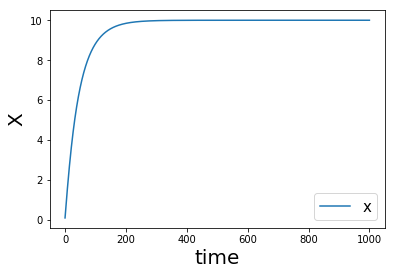

In [4]:
xout = odeint(f, x0, tvec)

plt.plot(tvec, xout, label='x') #x and y axis
plt.xlabel('time', fontsize=20)
plt.ylabel('X', fontsize=20)
plt.legend(fontsize=15)
plt.show()

Here we can see that even if "there was no protein at the beggining", the reaction can still happen and the concentration rises until more or less 10, where we can see it reaches a plateau, the steady state. 

Next we see what happens with different initial conditions.

In [ ]:
x0v = np.arange(0, 25, 3)

for x in x0v:
    xout = odeint(f, x, tvec)
    plt.plot(tvec, xout, label=x) #x and y axis
    
plt.xlabel('time', fontsize=20)
plt.ylabel('X', fontsize=20)
plt.legend(loc='upper right', fontsize=15)
plt.show()

Like in the previous figure, we can see the steady state plateau at x = 10, but he interesting thing is to see that the initial concentration of x is independent of this fact. The system will always stabilise at that concentration. 
We can see the speed changes a little depending on x inital value, but it always gets tot he same steady state, which ilustrates how stable negative feedbacks are

We now go back to $x_0=0.1$ and compare what happens with and without feedback (defining a new function to integrate and choosing $\alpha$ in the second case so that the steady state is approximately the same in both cases).
For that the function has to be: 

$$
\frac{dx}{dt}=\frac{\alpha}{2}-\delta x \equiv f(x)
$$

In [ ]:
x0 = 0.1

def f2(x,t):
    dxdt2 = alpha/2-delta*x
    return dxdt2

xout = odeint(f, x0, tvec)
xout2 = odeint(f2, x0, tvec)

plt.plot(tvec, xout2, label='no regulation')
plt.plot(tvec, xout, label='negative feedback')
plt.xlabel('time', fontsize=20)
plt.ylabel('X', fontsize=20)
plt.legend(fontsize=15)
plt.show()

This figure is to ilustrate that this system, without negative regultion, would also reach the same steady state, because at some point the production and degradation rate would be at an equilibrium, but it is clear that it would take much more time and, in biological systems, the efficiency is really important in order to save resources.

## Positive feedback

We now simulate a protein that activates its own production via positive feedback, according to the equation:

$$
\frac{dx}{dt}=f(x)=\frac{\alpha x^n}{k^n+x^n}-\delta x
$$

We also define the model parameters ($\alpha=0.21$, $k=10$ nM, $n=2$, and $\delta=1/100$ 1/min).

There are much less cases of positive feedback. 

In [ ]:
alpha = 0.21 #nM/min
k = 10 #nM
delta = 1/100 #1/min
n = 2 # Hill coefficient

def f3(x, t):
    dxdt3 = (alpha*(x**n))/((k**n)+(x**n))-delta*x
    return dxdt3

We now integrate the system for a variety of initial conditions.

In [ ]:
Tmax = 4000
dt = 0.1
x0v = np.arange(0, 15, 1)
tvec = np.arange(0, Tmax, dt)

for x in x0v:
    xout = odeint(f3, x, tvec)
    plt.plot(tvec, xout, label=x)

plt.xlabel('time', fontsize=15)
plt.ylabel('x', fontsize=15)
plt.legend(fontsize=8)
plt.show()

Here we can see, with the same kind of simulation than in the previous example, a really different plot. 
This is because possitive feedback usually acts like a switch in biological systems, so it has 2 possible states. Two possible steady states, in fact. 
It is also different than in the negative feedback example that, in this case, the initial concentration of x does matter for the result. We can see, more or less, that an initial condition of x < 7 would lead the system to the 0 steady state (no protein), whereas with a higher initial concentration of x the system would evolve to the x ~= 13 steady state. 
We can deduce from here that, for this mere reason, possitive feedbacks are less stable than the negative ones, but they are also present in nature. 

Finally, we calculate the steady state for different values of $\delta$ ranging from 1/50 to 1/500, and plot the steady state as a function of $\delta$.

In [ ]:
dvec = x0v = np.arange(1/500, 1/50, 0.0001)

For every value of delta, we should calculate the equation and pick and plot the positive value, so that we would see the line corresponding to the steady state in which there is portein concentration (because one steady state was without it). 
We should see a threshold where the line dissapears, because there's a value of delta for which the switch will "turn off". 
Also, if we would calculate either the line for the other steady state, that point for delta should coincide. 